# Fully-Connected Deep Learning 

Here we only focus on feed-forward networks. The feed-forward neural networks resemble non-linear regression. Neural networks is composed of hidden layers (projection), and each hidden layer contain several neurons (projection dimension). 

As the number of neurons in each layer increase, the network becomes _wider_. As the number of hidden layers increase, the network becomes _deeper_. 




## Simulated data 
As a simple starting example, remember the  bivariate classification on simulated data of **Chapter 3**. Here the matrix $X$ is the predictor and $Y$ is a binary classification indicator. In **Chapter 3** we used SVM to classify the data. This time we try a neural networks. In fitting neural networks there are several steps to follow

- Define the task, supervised (classification, regression), unsupervised (generative, anomaly detection,...), or reinforcement learning). 
- Set up data set X as predictive and Y as response
- Divide the data into training set and test set
- Define the predictive model 
- Train the model on training data
    - set the optimizer: an optimizer changes the weight values in order to decrease the loss function on the train set. Some are faster than others, but not necessarily better on the generalization error.
    - set the batch size: batch is a subset of data fed in the training step. 
    - set the number of epochs: epoch is like iteration. Epoch=1 when all data cirulcates into the training once. 
    - define the loss function: is a function used to estimate the weights
    - define the metric function: A metric is a function that is used to judge the performance of your model.  It is often more interpretable than the loss function.
    - define the regularization function: regularization is a way to slow down the optimization process such that the optimizer does not miss good area of the weights.
- Validate the model over the validation set and iterate over the previous step until a good performance
- Choose the best models and evaluate on the test set



In [1]:
# load required libraries
import numpy as np

import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

Using TensorFlow backend.


Start simulation, X is multivariate Gaussian, Y is a binary variable 0 or 1.

In [2]:
np.random.seed(0)
n = 100
X = np.vstack((np.random.multivariate_normal([0, 0], [[1, 0], [0,1]], n), 
               np.random.multivariate_normal([3, 3], [[1, 0], [0, 1]], n)))
Y = np.array([0] * n + [1] * n)

_keras_ library, requires Y to be one hot coded, i.e. $(0,1)$ for one class, and $(1,0)$ for another class.

In [3]:
# convert integer Y to dummy variable Y (i.e. one hot encoded)
Y = keras.utils.np_utils.to_categorical(Y)

Now divide data into training and validation sets. This data partition can provide a warning in the case of overfitting.

In [4]:
# divide data into train and validation 80% 20%
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 150)

Defining a model is simple. You must make sure what is the input dimension and what is the output dimension, then feed the data in. 

![title](../data/nn.png)


Here we start with a very simple model, a single  projection over a single dimension. This makes the neural model equivalent to the logistic regression.

In [5]:
#  define empty model
model1 = Sequential()

# specify the form of input and the form of output
model1.add(Dense(units = 2, input_dim = 2, activation = 'softmax'))
# input_dim is only required for the first layer
# units must match the form of the input for the next layer, here next layer is the output and is binary 
model1.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


Now we must feed the data into the constructed model. The data goes to the model by batch and model is fit using stochastic gradient descent. The batch size and epoch number are important parameters.

In [6]:
# train on the training data
fit1 = model1.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs = 20, batch_size = 64)

Train on 160 samples, validate on 40 samples
Epoch 1/20
160/160 [==============================] - 0s - loss: 1.2351 - acc: 0.1938 - val_loss: 0.9697 - val_acc: 0.4250
Epoch 2/20
160/160 [==============================] - 0s - loss: 1.2191 - acc: 0.1938 - val_loss: 0.9615 - val_acc: 0.4500
Epoch 3/20
160/160 [==============================] - 0s - loss: 1.2031 - acc: 0.1875 - val_loss: 0.9534 - val_acc: 0.4500
Epoch 4/20
160/160 [==============================] - 0s - loss: 1.1867 - acc: 0.1812 - val_loss: 0.9454 - val_acc: 0.4500
Epoch 5/20
160/160 [==============================] - 0s - loss: 1.1713 - acc: 0.1812 - val_loss: 0.9375 - val_acc: 0.4500
Epoch 6/20
160/160 [==============================] - 0s - loss: 1.1564 - acc: 0.1812 - val_loss: 0.9297 - val_acc: 0.4500
Epoch 7/20
160/160 [==============================] - 0s - loss: 1.1402 - acc: 0.1687 - val_loss: 0.9221 - val_acc: 0.4000
Epoch 8/20
160/160 [==============================] - 0s - loss: 1.1251 - acc: 0.1625 - val_lo

Here we just define a simple function to visualize the trend of accuracy gain in each epoch. When the dataset by batch is fed until all data are fed, epoch becomes 1. Then again a random sample by batch are fed until all data are fed and epoch becomes 2. Depending on a random start, the result of training might be different. It is a good idea to try fitting the model several times to see if the accuracy changes drammatically.

In [7]:
def accplot (fit, model, xtrain, ytrain, xvalid, yvalid, ylim=[0, 1]):
    print("Final Validation Accuracy: %.2f%%" % (model.evaluate(xvalid, yvalid, verbose=0)[1] * 100))
    print("Final Training Accuracy: %.2f%%" % (model.evaluate(xtrain, ytrain, verbose=0)[1] * 100))
    val_acc, = plt.plot(fit.history["val_acc"], label='Validation Accuracy', color = "blue")
    train_acc, = plt.plot(fit.history["acc"], label='Training Accuracy', color = "black")
    plt.title("Model Accuracy vs Epochs")
    plt.legend(loc="upper left")
    plt.ylim(ymin = ylim[0], ymax = ylim[1])
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.show()

def lossplot (fit, model, xtrain, ytrain, xvalid, yvalid):
    print("Final Validation Accuracy: %.2f%%" % (model.evaluate(xvalid, yvalid, verbose=0)[0] * 100))
    print("Final Training Accuracy: %.2f%%" % (model.evaluate(xtrain, ytrain, verbose=0)[0] * 100))
    val_loss, = plt.plot(fit.history["val_loss"], label='Validation Loss', color = "blue")
    train_loss, = plt.plot(fit.history["loss"], label='Training Loss', color = "black")
    plt.title("Loss vs Epochs")
    plt.legend(loc="upper left")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.show()

Final Validation Accuracy: 42.50%
Final Training Accuracy: 18.75%


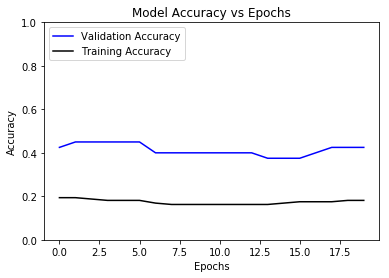

In [8]:
accplot(fit1, model1, X_train, Y_train, X_valid, Y_valid)

Final Validation Accuracy: 83.49%
Final Training Accuracy: 95.49%


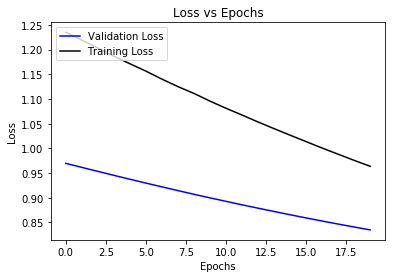

In [9]:
lossplot(fit1, model1, X_train, Y_train, X_valid, Y_valid)

Now that you trained a simple model, let's make the network deeper and wider. 

In [10]:
# Now a deeper and a wider model 
model2 = Sequential()
model2.add(Dense(units = 100, input_dim = 2, activation = 'sigmoid'))
model2.add(Dense(units = 100, activation='sigmoid'))
model2.add(Dense(units = 100, activation='sigmoid'))
model2.add(Dense(units = 100, activation='sigmoid'))
model2.add(Dense(units = 2, activation='softmax'))
model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model1.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
fit2 = model2.fit(X_train, Y_train, validation_data=(X_valid, Y_valid), epochs=20, batch_size=64)

Train on 160 samples, validate on 40 samples
Epoch 1/20
160/160 [==============================] - 0s - loss: 0.7093 - acc: 0.4562 - val_loss: 0.6848 - val_acc: 0.6750
Epoch 2/20
160/160 [==============================] - 0s - loss: 0.6888 - acc: 0.5438 - val_loss: 0.7886 - val_acc: 0.3250
Epoch 3/20
160/160 [==============================] - 0s - loss: 0.6976 - acc: 0.5438 - val_loss: 0.7974 - val_acc: 0.3250
Epoch 4/20
160/160 [==============================] - 0s - loss: 0.6914 - acc: 0.5438 - val_loss: 0.7258 - val_acc: 0.3250
Epoch 5/20
160/160 [==============================] - 0s - loss: 0.6847 - acc: 0.6000 - val_loss: 0.6806 - val_acc: 0.6750
Epoch 6/20
160/160 [==============================] - 0s - loss: 0.6868 - acc: 0.4688 - val_loss: 0.6873 - val_acc: 0.6500
Epoch 7/20
160/160 [==============================] - 0s - loss: 0.6826 - acc: 0.6625 - val_loss: 0.7248 - val_acc: 0.3250
Epoch 8/20
160/160 [==============================] - 0s - loss: 0.6772 - acc: 0.5438 - val_lo

Final Validation Accuracy: 85.00%
Final Training Accuracy: 93.12%


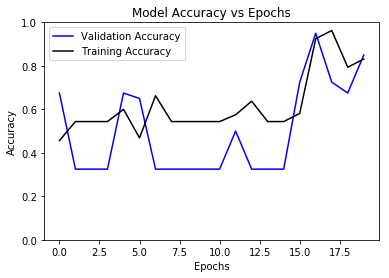

In [12]:
accplot(fit2, model2, X_train, Y_train, X_valid, Y_valid)

Final Validation Accuracy: 54.26%
Final Training Accuracy: 48.93%


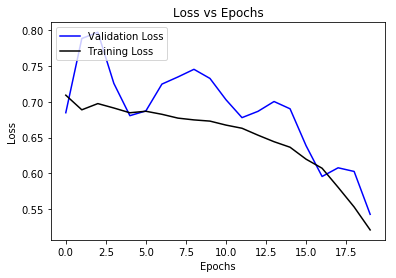

In [13]:
lossplot(fit2, model2, X_train, Y_train, X_valid, Y_valid)

## Zip data 
The zip data of **Chapter 4 ** is a more realistic data set. We try it first with a simple network, equivalent to multilogit model, and then using a wider and deeper network.

In [14]:
zipdata = np.loadtxt("../data/zip.train")
X=zipdata[:, 1:]
Y=zipdata[:, 0]
# one hot encoding of Y
Y = keras.utils.np_utils.to_categorical(Y)

In [15]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size = 0.2, random_state = 150)

In [16]:
# multi-logit regression
model3 = Sequential()
model3.add(Dense(units = 10, input_dim = 256, activation = 'softmax'))
model3.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
print(model3.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                2570      
Total params: 2,570
Trainable params: 2,570
Non-trainable params: 0
_________________________________________________________________
None


In [17]:
fit3 = model3.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 20, batch_size = 64)

Train on 5832 samples, validate on 1459 samples
Epoch 1/20
5832/5832 [==============================] - 0s - loss: 1.3999 - acc: 0.5622 - val_loss: 0.7350 - val_acc: 0.8047
Epoch 2/20
5832/5832 [==============================] - 0s - loss: 0.5458 - acc: 0.8623 - val_loss: 0.4674 - val_acc: 0.8876
Epoch 3/20
5832/5832 [==============================] - 0s - loss: 0.3861 - acc: 0.9019 - val_loss: 0.3735 - val_acc: 0.9116
Epoch 4/20
5832/5832 [==============================] - 0s - loss: 0.3201 - acc: 0.9201 - val_loss: 0.3246 - val_acc: 0.9184
Epoch 5/20
5832/5832 [==============================] - 0s - loss: 0.2803 - acc: 0.9312 - val_loss: 0.2917 - val_acc: 0.9219
Epoch 6/20
5832/5832 [==============================] - 0s - loss: 0.2536 - acc: 0.9360 - val_loss: 0.2710 - val_acc: 0.9287
Epoch 7/20
5832/5832 [==============================] - 0s - loss: 0.2352 - acc: 0.9400 - val_loss: 0.2571 - val_acc: 0.9308
Epoch 8/20
5832/5832 [==============================] - 0s - loss: 0.2204 - a

Final Validation Accuracy: 94.45%
Final Training Accuracy: 96.38%


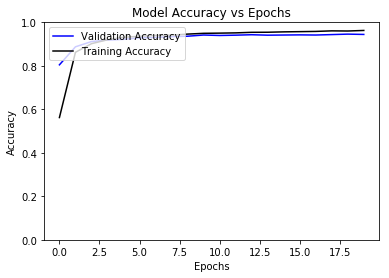

In [18]:
accplot(fit3, model3, X_train, Y_train, X_valid, Y_valid)

## Fully-connected Deep and Wide Network
The sigmoid activation function is hard to use in practice. The relu is faster and often enjoys a better convergence properties, and also is more popular. A fully connected model for zip data is visualized http://scs.ryerson.ca/~aharley/vis/fc/

In [19]:
# multi-logit regression
model4 = Sequential()
model4.add(Dense(units = 500, input_dim = 256, activation = 'relu')) #layer 01
model4.add(Dense(units = 500, input_dim = 256, activation = 'relu')) #layer 02
model4.add(Dense(units = 500, input_dim = 256, activation = 'relu')) #layer 03
model4.add(Dense(units = 500, input_dim = 256, activation = 'relu')) #layer 04
model4.add(Dense(units = 500, input_dim = 256, activation = 'relu')) #layer 05
model4.add(Dense(units = 10, activation = 'softmax'))  # layer output
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model4.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 500)               128500    
_________________________________________________________________
dense_9 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_10 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_11 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_12 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                5010      
Total params: 1,135,510
Trainable params: 1,135,510
Non-trainable params: 0
_________________________________________________________________


In [20]:
fit4 = model4.fit(X_train, Y_train, validation_data = (X_valid, Y_valid), epochs = 20, batch_size = 64)

Train on 5832 samples, validate on 1459 samples
Epoch 1/20
5832/5832 [==============================] - 2s - loss: 0.4017 - acc: 0.8736 - val_loss: 0.2128 - val_acc: 0.9472
Epoch 2/20
5832/5832 [==============================] - 1s - loss: 0.1433 - acc: 0.9552 - val_loss: 0.1897 - val_acc: 0.9486
Epoch 3/20
5832/5832 [==============================] - 1s - loss: 0.0919 - acc: 0.9719 - val_loss: 0.1659 - val_acc: 0.9568
Epoch 4/20
5832/5832 [==============================] - 1s - loss: 0.0652 - acc: 0.9805 - val_loss: 0.1415 - val_acc: 0.9685
Epoch 5/20
5832/5832 [==============================] - 2s - loss: 0.0667 - acc: 0.9798 - val_loss: 0.1955 - val_acc: 0.9541
Epoch 6/20
5832/5832 [==============================] - 2s - loss: 0.0456 - acc: 0.9846 - val_loss: 0.2061 - val_acc: 0.9609
Epoch 7/20
5832/5832 [==============================] - 2s - loss: 0.0669 - acc: 0.9822 - val_loss: 0.1504 - val_acc: 0.9719
Epoch 8/20
5832/5832 [==============================] - 2s - loss: 0.0499 - a

Final Validation Accuracy: 95.34%
Final Training Accuracy: 98.94%


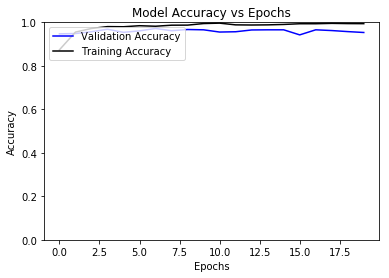

In [21]:
accplot(fit4, model4, X_train, Y_train, X_valid, Y_valid)

Final Validation Accuracy: 30.02%
Final Training Accuracy: 3.93%


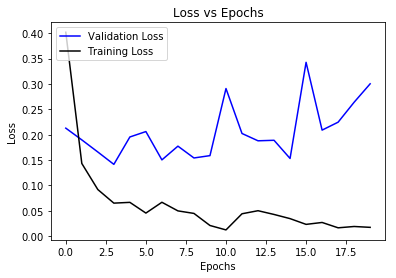

In [22]:
lossplot(fit4, model4, X_train, Y_train, X_valid, Y_valid)

# Convolutional Deep Learning

In previous models the spatial structure of image was ignored. Convolutional network is a building-block of image (and text) modeling. First 256 pixel data must be re-formatted as 16X16 image as in **Chapter 4**. Then the re-structured data are fed into the model in batches as before. The convulitional model for the zip data is visualized here http://scs.ryerson.ca/~aharley/vis/conv/

In [23]:
# re-structure the data into images 16X16 images
X_train2D = np.zeros(shape = [X_train.shape[0], 16, 16, 1])
X_valid2D = np.zeros(shape = [X_valid.shape[0], 16, 16, 1])

for i in range(X_train.shape[0]):
    X_train2D[i,] = X_train[i, ].reshape(16, 16, 1)

for i in range(X_valid.shape[0]):
    X_valid2D[i,] = X_valid[i, ].reshape(16, 16, 1)

In [24]:
[X_train.shape[0], 16, 16, 1]

[5832, 16, 16, 1]

Now we try to build two layers of convolutions. Often a convolutional layer is attached to a max-pooling layer. At the top layer, often a fully-connected layer is attached to the max-pooling layer (right before the output layer), to combine the convolution information. 

In [25]:

model5 = Sequential()
model5.add(Conv2D(filters = 8, kernel_size = [6,6], padding = 'same', 
                  input_shape = (16, 16, 1), activation = 'relu'))
model5.add(MaxPooling2D(pool_size=2))
model5.add(Conv2D(filters = 16, kernel_size = [4,4], padding = 'same', 
                  input_shape = (16, 16, 1), activation = 'relu'))
model5.add(MaxPooling2D(pool_size = 4))
model5.add(Flatten())
model5.add(Dense(units = 256, activation = 'relu'))  # layer output
model5.add(Dense(units = 10, activation = 'softmax'))  # layer output
model5.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [26]:
print(model5.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 8)         296       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               16640     
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total para

In [27]:
fit5 = model5.fit(X_train2D, Y_train, validation_data=(X_valid2D, Y_valid), 
                  epochs = 20, batch_size = 64)


Train on 5832 samples, validate on 1459 samples
Epoch 1/20
5832/5832 [==============================] - 1s - loss: 1.1604 - acc: 0.6348 - val_loss: 0.3403 - val_acc: 0.9102
Epoch 2/20
5832/5832 [==============================] - 1s - loss: 0.2184 - acc: 0.9338 - val_loss: 0.1936 - val_acc: 0.9424
Epoch 3/20
5832/5832 [==============================] - 1s - loss: 0.1354 - acc: 0.9590 - val_loss: 0.1406 - val_acc: 0.9568
Epoch 4/20
5832/5832 [==============================] - 1s - loss: 0.1002 - acc: 0.9721 - val_loss: 0.1262 - val_acc: 0.9637
Epoch 5/20
5832/5832 [==============================] - 1s - loss: 0.0791 - acc: 0.9779 - val_loss: 0.1173 - val_acc: 0.9650
Epoch 6/20
5832/5832 [==============================] - 1s - loss: 0.0619 - acc: 0.9827 - val_loss: 0.1104 - val_acc: 0.9671
Epoch 7/20
5832/5832 [==============================] - 1s - loss: 0.0525 - acc: 0.9846 - val_loss: 0.0880 - val_acc: 0.9774
Epoch 8/20
5832/5832 [==============================] - 1s - loss: 0.0448 - a

Final Validation Accuracy: 98.22%
Final Training Accuracy: 99.83%


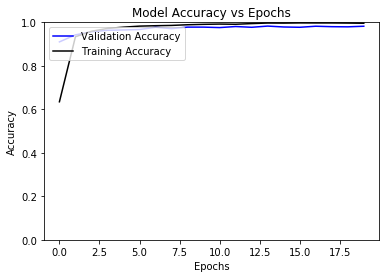

In [28]:
accplot(fit5, model5, X_train2D, Y_train, X_valid2D, Y_valid)

Final Validation Accuracy: 8.57%
Final Training Accuracy: 0.79%


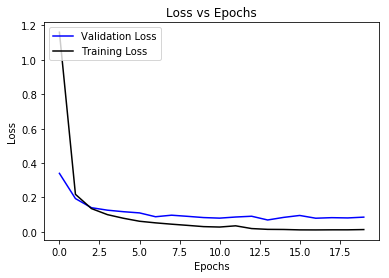

In [29]:
lossplot(fit5, model5, X_train2D, Y_train, X_valid2D, Y_valid)

# The role of the test data
After fitting various models, the final model is checked using an independent set of data, called the test set. Choosing the best model according to the test set will result in a little bit of overfitting.
The test set is only there to see how the model behaves in production mode. 


First we must prepare the data. We need to prepare once for fully-connected models that only receives vector X (1X256) as predictors, and another data that receives a matrix 16X16 as predictors.
The categorical reponse variable Y, like the training section must be one hot coded. 

In [30]:
zipdata = np.loadtxt("../data/zip.test")
# divide data into preditor X_test, and response Y_test
X_test = zipdata[:,1:]
Y_test = zipdata[:,0]

# one hot encoding of Y_test
Y_test = keras.utils.np_utils.to_categorical(Y_test)

# reshape X_test for convolutional model
X_test2D = np.zeros(shape = [X_test.shape[0], 16, 16, 1])
for i in range(X_test.shape[0]):
    X_test2D[i, ] = X_test[i, ].reshape(16, 16, 1)


In [31]:
#  check the accuracy of multilogit  (no hidden layer) model
score3 = model3.evaluate(X_test, Y_test, verbose = 0)

# check the accuracy of wide and deep fully-connected model
score4 = model4.evaluate(X_test, Y_test, verbose = 0)

# check the accuracy of convolutional model
score5 = model5.evaluate(X_test2D, Y_test, verbose = 0)


In [32]:
print score3[1], score4[1], score5[1]

0.90981564536 0.921275535744 0.952665670273
